In [2]:
## This is a demo project to find statistical pattern of raw data

In [45]:
import numpy as np
import pandas as pd
# Visualization Libraries
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import seaborn as sns
from sklearn import datasets # for using built-in datasets
from sklearn import metrics # for checking the model accuracy
#To plot the graph embedded in the notebook
%matplotlib inline

In [46]:
evaluation_df=pd.read_csv('evaluation_dataset.csv')
evaluation_df
#please install openpyxl in pip before loading the excel file

BCT Name  TS  TV  TA  FA  RE  SE  CA  MC  EE  PE  BI  JR  Ex  \
0                 Bitcoin   6   6   6   6   6   7   7   6   6   7   6 NaN   4   
1                Etherium   4   4   4   8   8   6   8   2   4   7   6 NaN   8   
2                  Solana   4   4   4   8   7   7   7   3  10   7   8 NaN   4   
3                Dogecoin   8   8   8   4   2   2   2   8   4   8   7 NaN   8   
4           Axie Infinity   8   8   8   4   6   6   6   6   6   6   7 NaN   8   
5  Social NFT MarketPlace   5   5   5   7  10   8   9   1   6   8   5 NaN   0   

   Im  SI  PV  PU  SC  TL (%)  
0   6   5   6   5   4      54  
1   8   7   8   8   4      56  
2   8   7   8   7  10      72  
3   6   8   4   7  10      72  
4   9   8   8   8   3      56  
5  10   2   8   5   6      48

In [47]:
evaluation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 20 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   BCT Name  6 non-null      object 
 1   TS        6 non-null      int64  
 2   TV        6 non-null      int64  
 3   TA        6 non-null      int64  
 4   FA        6 non-null      int64  
 5   RE        6 non-null      int64  
 6   SE        6 non-null      int64  
 7   CA        6 non-null      int64  
 8   MC        6 non-null      int64  
 9   EE        6 non-null      int64  
 10  PE        6 non-null      int64  
 11  BI        6 non-null      int64  
 12  JR        0 non-null      float64
 13  Ex        6 non-null      int64  
 14  Im        6 non-null      int64  
 15  SI        6 non-null      int64  
 16  PV        6 non-null      int64  
 17  PU        6 non-null      int64  
 18  SC        6 non-null      int64  
 19  TL (%)    6 non-null      int64  
dtypes: float64(1), int64(18), object(1)


In [52]:
#Preprocessing
evaluation_df.isnull().mean()
print(evaluation_df)
evaluation_df

                 BCT Name  TS  TV  TA  FA  RE  SE  CA  MC  EE  PE  BI  JR  Ex  \
0                 Bitcoin   6   6   6   6   6   7   7   6   6   7   6 NaN   4   
1                Etherium   4   4   4   8   8   6   8   2   4   7   6 NaN   8   
2                  Solana   4   4   4   8   7   7   7   3  10   7   8 NaN   4   
3                Dogecoin   8   8   8   4   2   2   2   8   4   8   7 NaN   8   
4           Axie Infinity   8   8   8   4   6   6   6   6   6   6   7 NaN   8   
5  Social NFT MarketPlace   5   5   5   7  10   8   9   1   6   8   5 NaN   0   

   Im  SI  PV  PU  SC  TL (%)  
0   6   5   6   5   4      54  
1   8   7   8   8   4      56  
2   8   7   8   7  10      72  
3   6   8   4   7  10      72  
4   9   8   8   8   3      56  
5  10   2   8   5   6      48  


BCT Name  TS  TV  TA  FA  RE  SE  CA  MC  EE  PE  BI  JR  Ex  \
0                 Bitcoin   6   6   6   6   6   7   7   6   6   7   6 NaN   4   
1                Etherium   4   4   4   8   8   6   8   2   4   7   6 NaN   8   
2                  Solana   4   4   4   8   7   7   7   3  10   7   8 NaN   4   
3                Dogecoin   8   8   8   4   2   2   2   8   4   8   7 NaN   8   
4           Axie Infinity   8   8   8   4   6   6   6   6   6   6   7 NaN   8   
5  Social NFT MarketPlace   5   5   5   7  10   8   9   1   6   8   5 NaN   0   

   Im  SI  PV  PU  SC  TL (%)  
0   6   5   6   5   4      54  
1   8   7   8   8   4      56  
2   8   7   8   7  10      72  
3   6   8   4   7  10      72  
4   9   8   8   8   3      56  
5  10   2   8   5   6      48

In [53]:
evaluation_df.describe()

TS        TV        TA        FA         RE        SE        CA  \
count  6.000000  6.000000  6.000000  6.000000   6.000000  6.000000  6.000000   
mean   5.833333  5.833333  5.833333  6.166667   6.500000  6.000000  6.500000   
std    1.834848  1.834848  1.834848  1.834848   2.664583  2.097618  2.428992   
min    4.000000  4.000000  4.000000  4.000000   2.000000  2.000000  2.000000   
25%    4.250000  4.250000  4.250000  4.500000   6.000000  6.000000  6.250000   
50%    5.500000  5.500000  5.500000  6.500000   6.500000  6.500000  7.000000   
75%    7.500000  7.500000  7.500000  7.750000   7.750000  7.000000  7.750000   
max    8.000000  8.000000  8.000000  8.000000  10.000000  8.000000  9.000000   

             MC        EE        PE        BI   JR        Ex         Im  \
count  6.000000   6.00000  6.000000  6.000000  0.0  6.000000   6.000000   
mean   4.333333   6.00000  7.166667  6.500000  NaN  5.333333   7.833333   
std    2.732520   2.19089  0.752773  1.048809  NaN  3.265986   1.602082   
min    1.000000   4.00000  6.000000  5.000000  NaN  0.000000   6.000000   
25%    2.250000   4.50000  7.000000  6.000000  NaN  4.000000   6.500000   
50%    4.500000   6.00000  7.000000  6.500000  NaN  6.000000   8.000000   
75%    6.000000   6.00000  7.750000  7.000000  NaN  8.000000   8.750000   
max    8.000000  10.00000  8.000000  8.000000  NaN  8.000000  10.000000   

             SI       PV        PU         SC     TL (%)  
count  6.000000  6.00000  6.000000   6.000000   6.000000  
mean   6.166667  7.00000  6.666667   6.166667  59.666667  
std    2.316607  1.67332  1.366260   3.125167   9.993331  
min    2.000000  4.00000  5.000000   3.000000  48.000000  
25%    5.500000  6.50000  5.500000   4.000000  54.500000  
50%    7.000000  8.00000  7.000000   5.000000  56.000000  
75%    7.750000  8.00000  7.750000   9.000000  68.000000  
max    8.000000  8.00000  8.000000  10.000000  72.000000

In [54]:
correlation_matrix=evaluation_df.corr().round(2)
plt.figure(figsize=(9,6))
sns.heatmap(data=correlation_matrix, annot=True)

<AxesSubplot:>

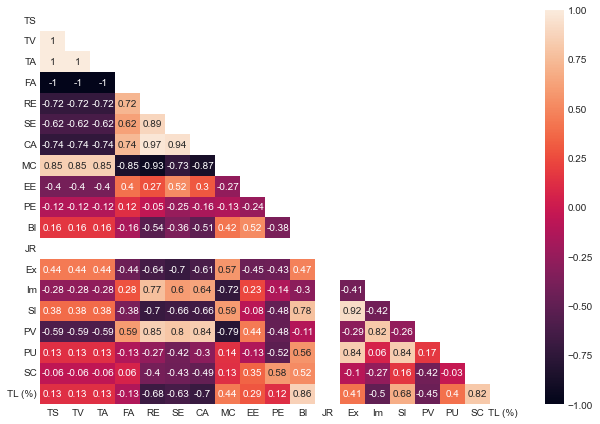

In [55]:
# Steps to remove redundant values
# Return a array filled with zeros
mask = np.zeros_like(correlation_matrix)
# Return the indices for the upper-triangle of array
mask[np.triu_indices_from(mask)] = True
# changing the figure size
plt.figure(figsize = (9, 6))
# "annot = True" to print the values inside the square
fig=sns.heatmap(data=correlation_matrix, annot=True, mask=mask);
plt.savefig('test.png', bbox_inches='tight')


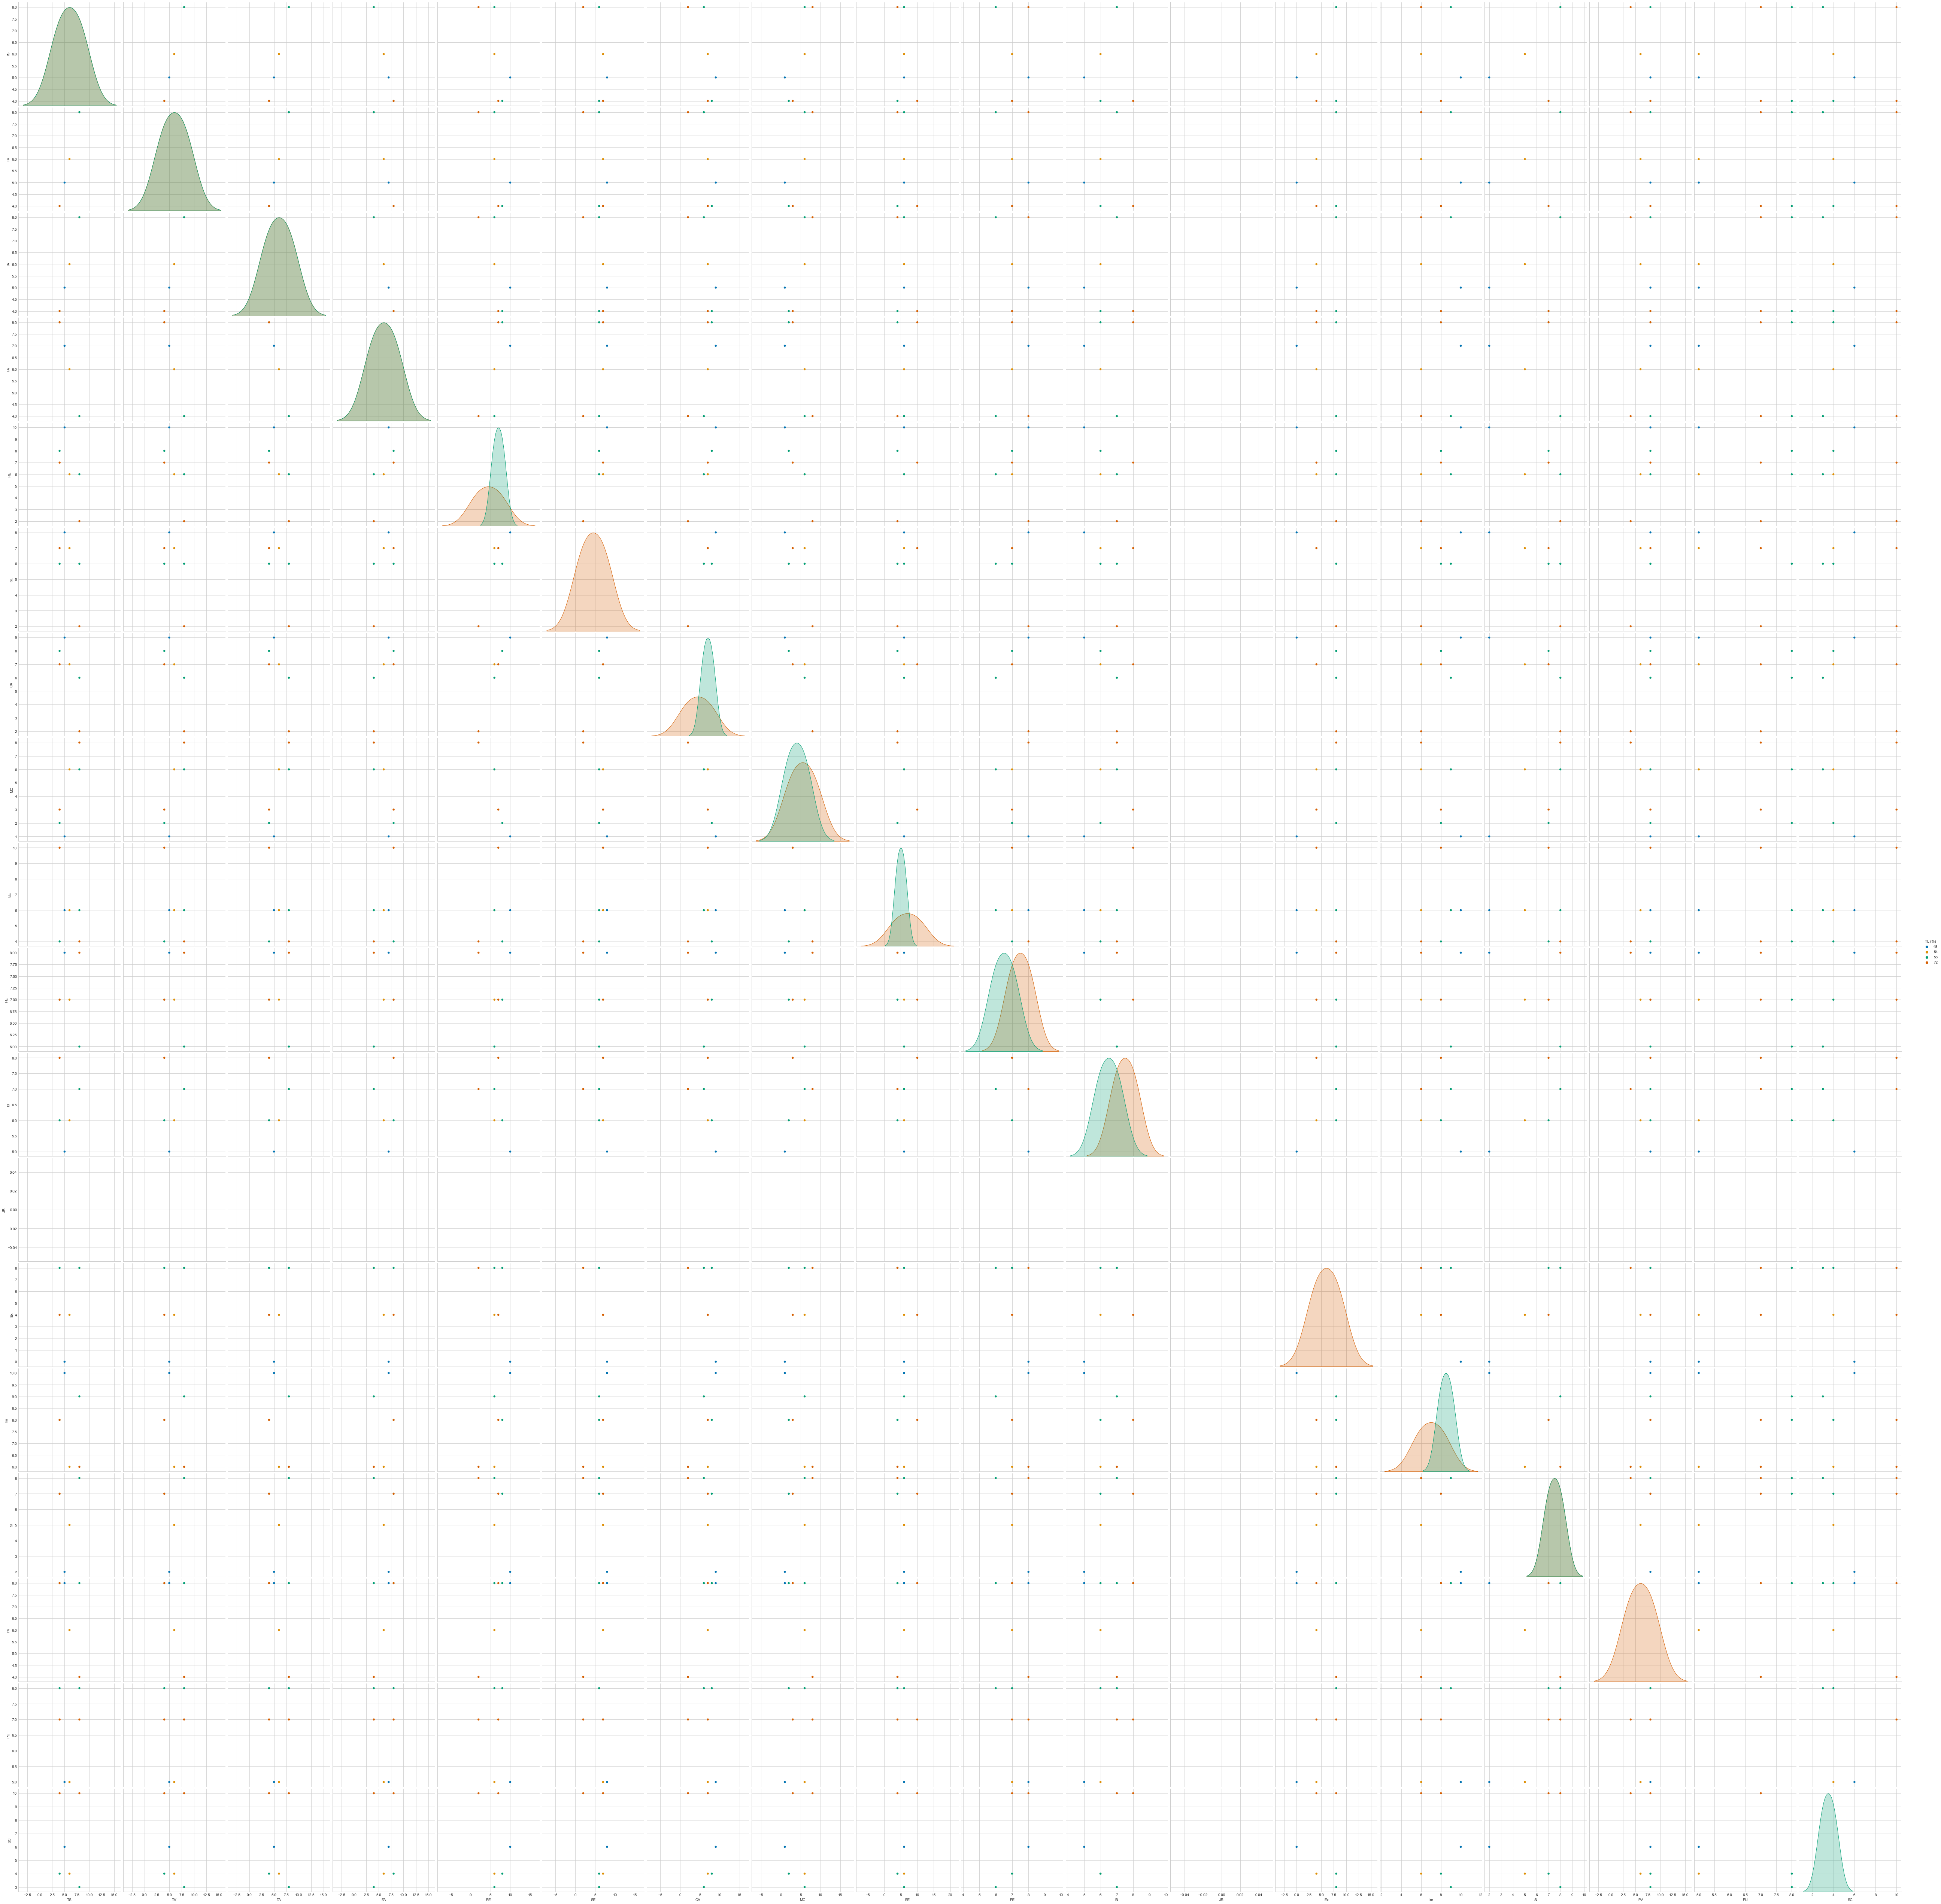

In [56]:
sns.pairplot(evaluation_df, hue="TL (%)",height=4, palette = 'colorblind');

In [57]:
X=evaluation_df[['TS','TV','RE','SE','SC','PE','EE','Ex','Im','SI']]
X

TS  TV  RE  SE  SC  PE  EE  Ex  Im  SI
0   6   6   6   7   4   7   6   4   6   5
1   4   4   8   6   4   7   4   8   8   7
2   4   4   7   7  10   7  10   4   8   7
3   8   8   2   2  10   8   4   8   6   8
4   8   8   6   6   3   6   6   8   9   8
5   5   5  10   8   6   8   6   0  10   2

In [25]:
y=evaluation_df['TL (%)']
y

0    54
1    56
2    72
3    72
4    56
5    48
Name: TL (%), dtype: int64

In [68]:
#Create Model: Support Vector Machine (SVM)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.001, random_state = 16)
print("X_train shape: ", X_train.shape)
print("X_test shape: ", X_test.shape)
print("y_train shape: ", y_train.shape)
print("y_test shape: ", y_test.shape)

X_train shape:  (5, 10)
X_test shape:  (1, 10)
y_train shape:  (5,)
y_test shape:  (1,)


In [69]:
 # importing the necessary package to use the classification algorithm
from sklearn import svm #for Support Vector Machine (SVM) Algorithm
model_svm = svm.SVC() #select the algorithm
model_svm.fit(X_train, y_train) #train the model with the training dataset
y_prediction_svm = model_svm.predict(X_test) # pass the testing data to the trained model
# checking the accuracy of the algorithm. 
# by comparing predicted output by the model and the actual output
score_svm = metrics.accuracy_score(y_prediction_svm, y_test).round(4)
print("----------------------------------")
print('The accuracy of the SVM is: {}'.format(score_svm))
print("----------------------------------")
# save the accuracy score
score = set()
score.add(('SVM', score_svm))

----------------------------------
The accuracy of the SVM is: 0.0
----------------------------------


In [70]:
 # importing the necessary package to use the classification algorithm
from sklearn.tree import DecisionTreeClassifier #for using Decision Tree Algoithm
model_dt = DecisionTreeClassifier(random_state=4)
model_dt.fit(X_train, y_train) #train the model with the training dataset
y_prediction_dt = model_dt.predict(X_test) #pass the testing data to the trained model
# checking the accuracy of the algorithm. 
# by comparing predicted output by the model and the actual output
score_dt = metrics.accuracy_score(y_prediction_dt, y_test).round(4)
print("---------------------------------")
print('The accuracy of the DT is: {}'.format(score_dt))
print("---------------------------------")
# save the accuracy score
score.add(('DT', score_dt))

---------------------------------
The accuracy of the DT is: 0.0
---------------------------------


In [71]:
# importing the necessary package to use the classification algorithm
from sklearn.neighbors import KNeighborsClassifier # for K nearest neighbours
#from sklearn.linear_model import LogisticRegression # for Logistic Regression algorithm
model_knn = KNeighborsClassifier(n_neighbors=3) # 3 neighbours for putting the new data into a class
model_knn.fit(X_train, y_train) #train the model with the training dataset
y_prediction_knn = model_knn.predict(X_test) #pass the testing data to the trained model
# checking the accuracy of the algorithm. 
# by comparing predicted output by the model and the actual output
score_knn = metrics.accuracy_score(y_prediction_knn, y_test).round(4)
print("----------------------------------")
print('The accuracy of the KNN is: {}'.format(score_knn))
print("----------------------------------")
# save the accuracy score
score.add(('KNN', score_knn))


----------------------------------
The accuracy of the KNN is: 0.0
----------------------------------


In [72]:
 # importing the necessary package to use the classification algorithm
from sklearn.linear_model import LogisticRegression # for Logistic Regression algorithm
model_lr = LogisticRegression()
model_lr.fit(X_train, y_train) #train the model with the training dataset
y_prediction_lr = model_lr.predict(X_test) #pass the testing data to the trained model
# checking the accuracy of the algorithm. 
# by comparing predicted output by the model and the actual output
score_lr = metrics.accuracy_score(y_prediction_lr, y_test).round(4)
print("---------------------------------")
print('The accuracy of the LR is: {}'.format(score_lr))
print("---------------------------------")
# save the accuracy score
score.add(('LR', score_lr))

---------------------------------
The accuracy of the LR is: 0.0
---------------------------------


In [73]:
# importing the necessary package to use the classification algorithm
from sklearn.naive_bayes import GaussianNB
model_nb = GaussianNB()
model_nb.fit(X_train, y_train) #train the model with the training dataset
y_prediction_nb = model_nb.predict(X_test) #pass the testing data to the trained model
# checking the accuracy of the algorithm. 
# by comparing predicted output by the model and the actual output
score_nb = metrics.accuracy_score(y_prediction_nb, y_test).round(4)
print("---------------------------------")
print('The accuracy of the NB is: {}'.format(score_nb))
print("---------------------------------")
# save the accuracy score
score.add(('NB', score_nb))

---------------------------------
The accuracy of the NB is: 0.0
---------------------------------


In [74]:
print("The accuracy scores of different Models:")
print("----------------------------------------")
for s in score:
 print(s)


The accuracy scores of different Models:
----------------------------------------
('DT', 0.0)
('NB', 0.0)
('LR', 0.0)
('KNN', 0.0)
('SVM', 0.0)
